# **Decision Tree**

## *Data Import*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("penguins.csv")

## *About Data*

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
df.dropna(inplace= True)

In [8]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [9]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [10]:
df.sex.unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [11]:
df[df.sex == "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [12]:
df = df[df.sex != "."]

In [13]:
df.species.value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [14]:
df.island.value_counts()

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

## *Visualization*

<Axes: xlabel='species', ylabel='count'>

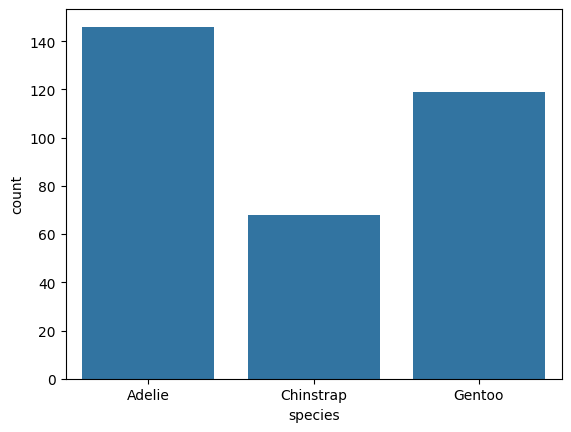

In [15]:
sns.countplot(data= df, x= "species")

<Axes: xlabel='island', ylabel='count'>

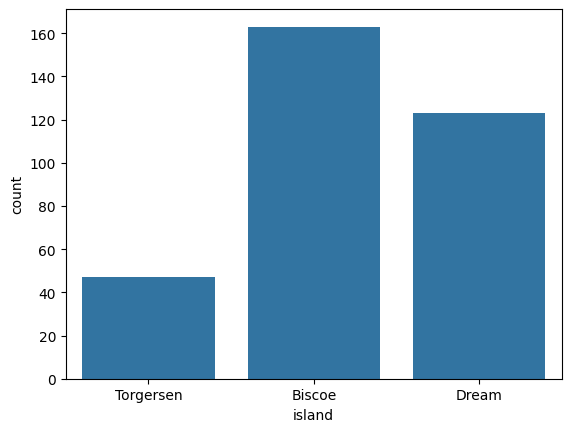

In [16]:
sns.countplot(data= df, x= "island")

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

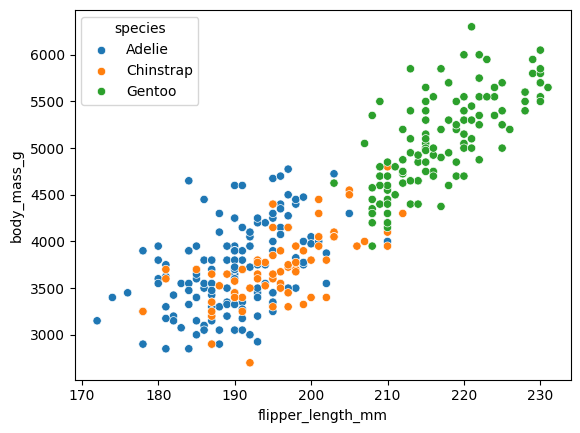

In [17]:
sns.scatterplot(data= df, x= "flipper_length_mm", y= "body_mass_g", hue= "species")

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

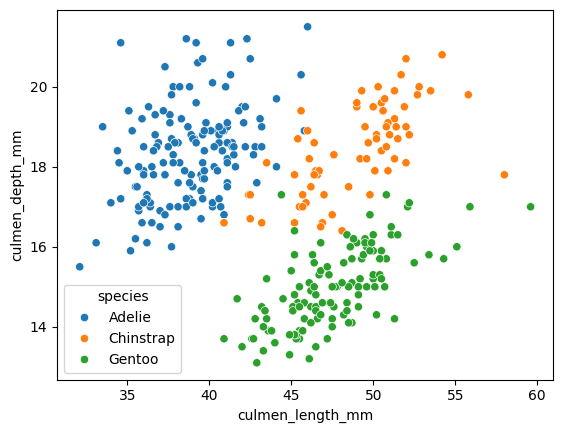

In [18]:
sns.scatterplot(data= df, x= "culmen_length_mm", y= "culmen_depth_mm", hue= "species")

<Axes: xlabel='species', ylabel='culmen_length_mm'>

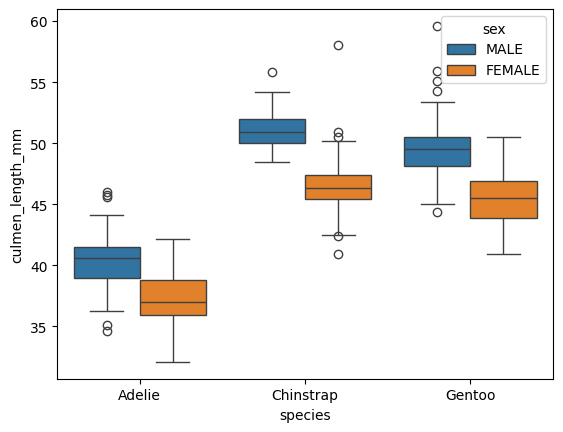

In [19]:
sns.boxplot(data= df, x= "species", y= "culmen_length_mm", hue= "sex")

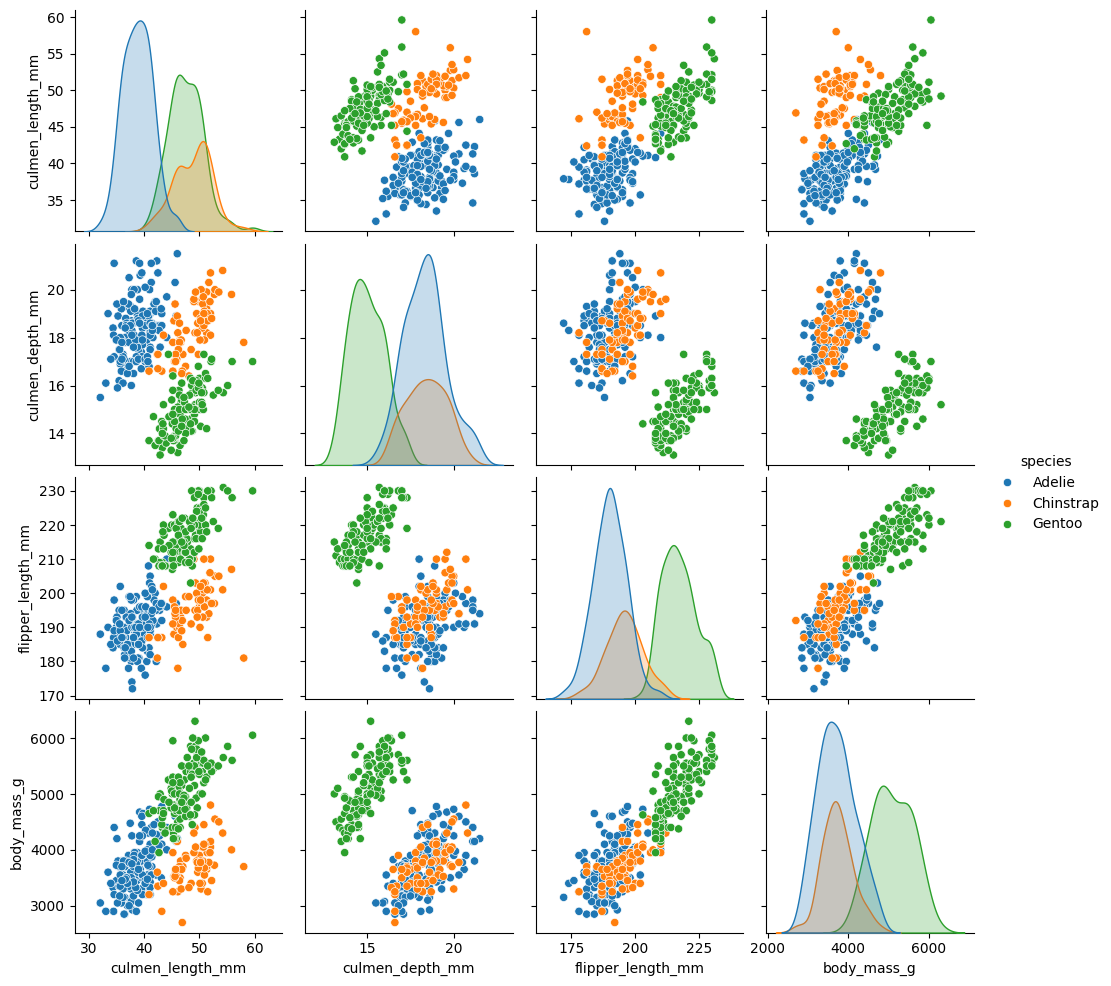

In [20]:
sns.pairplot(data= df, hue= "species")

<Axes: >

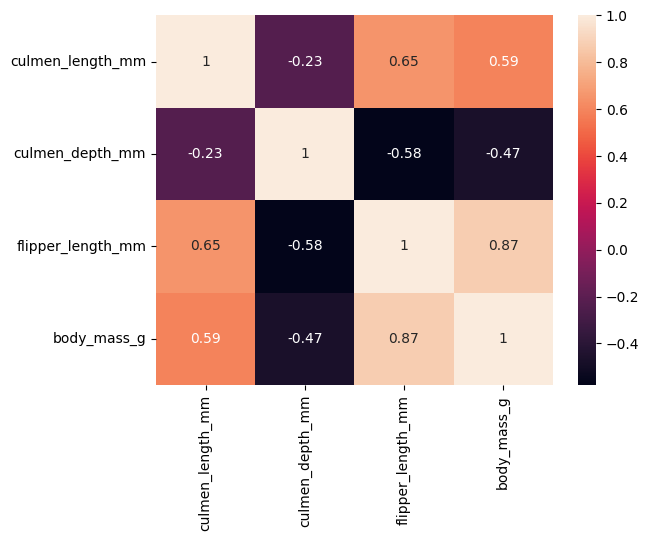

In [21]:
sns.heatmap(df.corr(numeric_only= True), annot= True)

## *Train Test Split*

In [22]:
pd.get_dummies(df.drop("species", axis= 1), drop_first= True)
# label encoder = one hot encoder = get dummies

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True,True
1,39.5,17.4,186.0,3800.0,False,True,False
2,40.3,18.0,195.0,3250.0,False,True,False
4,36.7,19.3,193.0,3450.0,False,True,False
5,39.3,20.6,190.0,3650.0,False,True,True
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,False
340,46.8,14.3,215.0,4850.0,False,False,False
341,50.4,15.7,222.0,5750.0,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,False


In [23]:
X = pd.get_dummies(df.drop("species", axis= 1), drop_first= True)
y = df["species"]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

## *Desicion Tree Model*

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
model = DecisionTreeClassifier()

In [28]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
prediction = model.predict(X_test)

## *Performance*

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [31]:
confusion_matrix(y_test, prediction)

array([[43,  2,  1],
       [ 1, 22,  0],
       [ 0,  0, 31]])

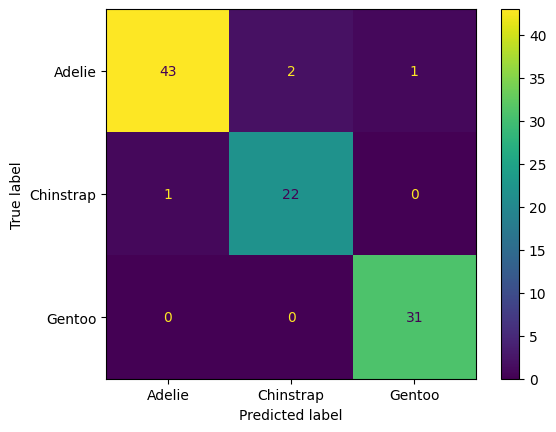

In [32]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [33]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

      Adelie       0.98      0.93      0.96        46
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       0.97      1.00      0.98        31

    accuracy                           0.96       100
   macro avg       0.95      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [34]:
pd.DataFrame(index= X.columns, data= model.feature_importances_, columns= ["coefficients"])

,coefficients
culmen_length_mm,0.358235
culmen_depth_mm,0.011106
flipper_length_mm,0.550960
body_mass_g,0.011250
island_Dream,0.068449
island_Torgersen,0.000000
sex_MALE,0.000000


In [35]:
from sklearn.tree import plot_tree

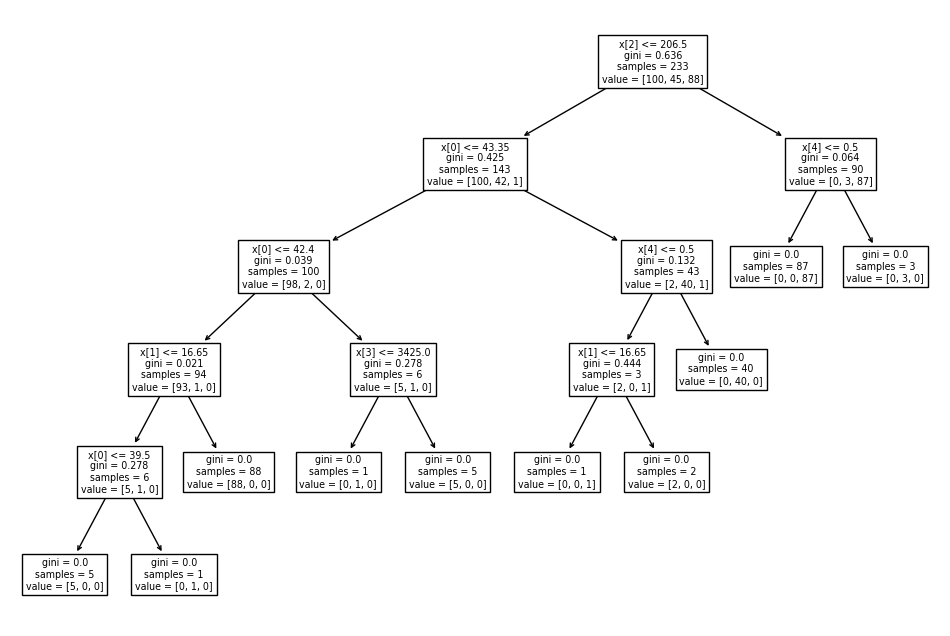

In [36]:
plt.figure(figsize= (12, 8))
plot_tree(model);

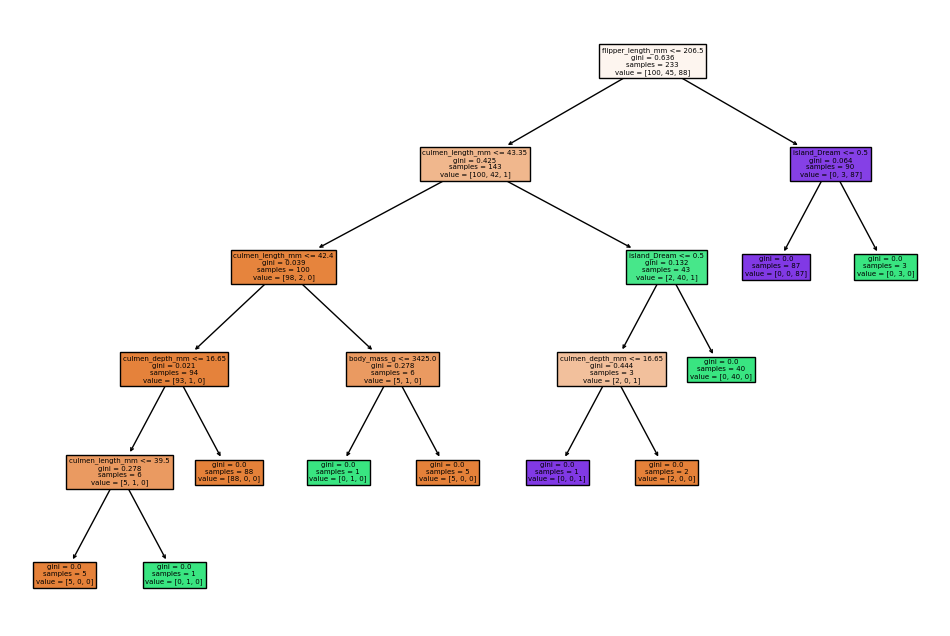

In [37]:
plt.figure(figsize= (12, 8))
plot_tree(model, filled= True, feature_names= X.columns);

### **Less Depth**

In [44]:
def result(m):
    pred = m.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(m, X_test, y_test)
    print(classification_report(y_test, pred), "\n")
    plt.figure(figsize= (12, 8), dpi= 200)
    plot_tree(m, filled= True, feature_names= X.columns)

In [45]:
less_depth = DecisionTreeClassifier(max_depth= 2)

In [46]:
less_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.93      0.91      0.92        46
   Chinstrap       0.87      0.87      0.87        23
      Gentoo       0.97      1.00      0.98        31

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100
 



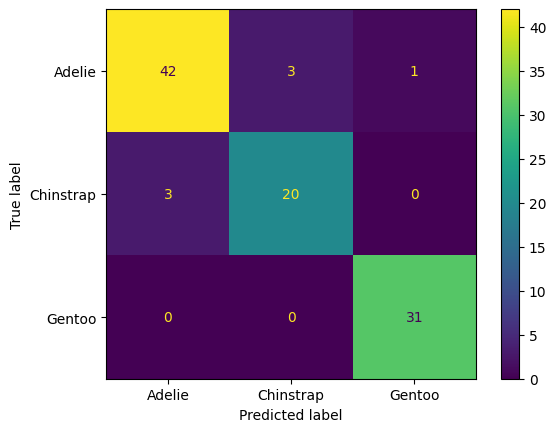

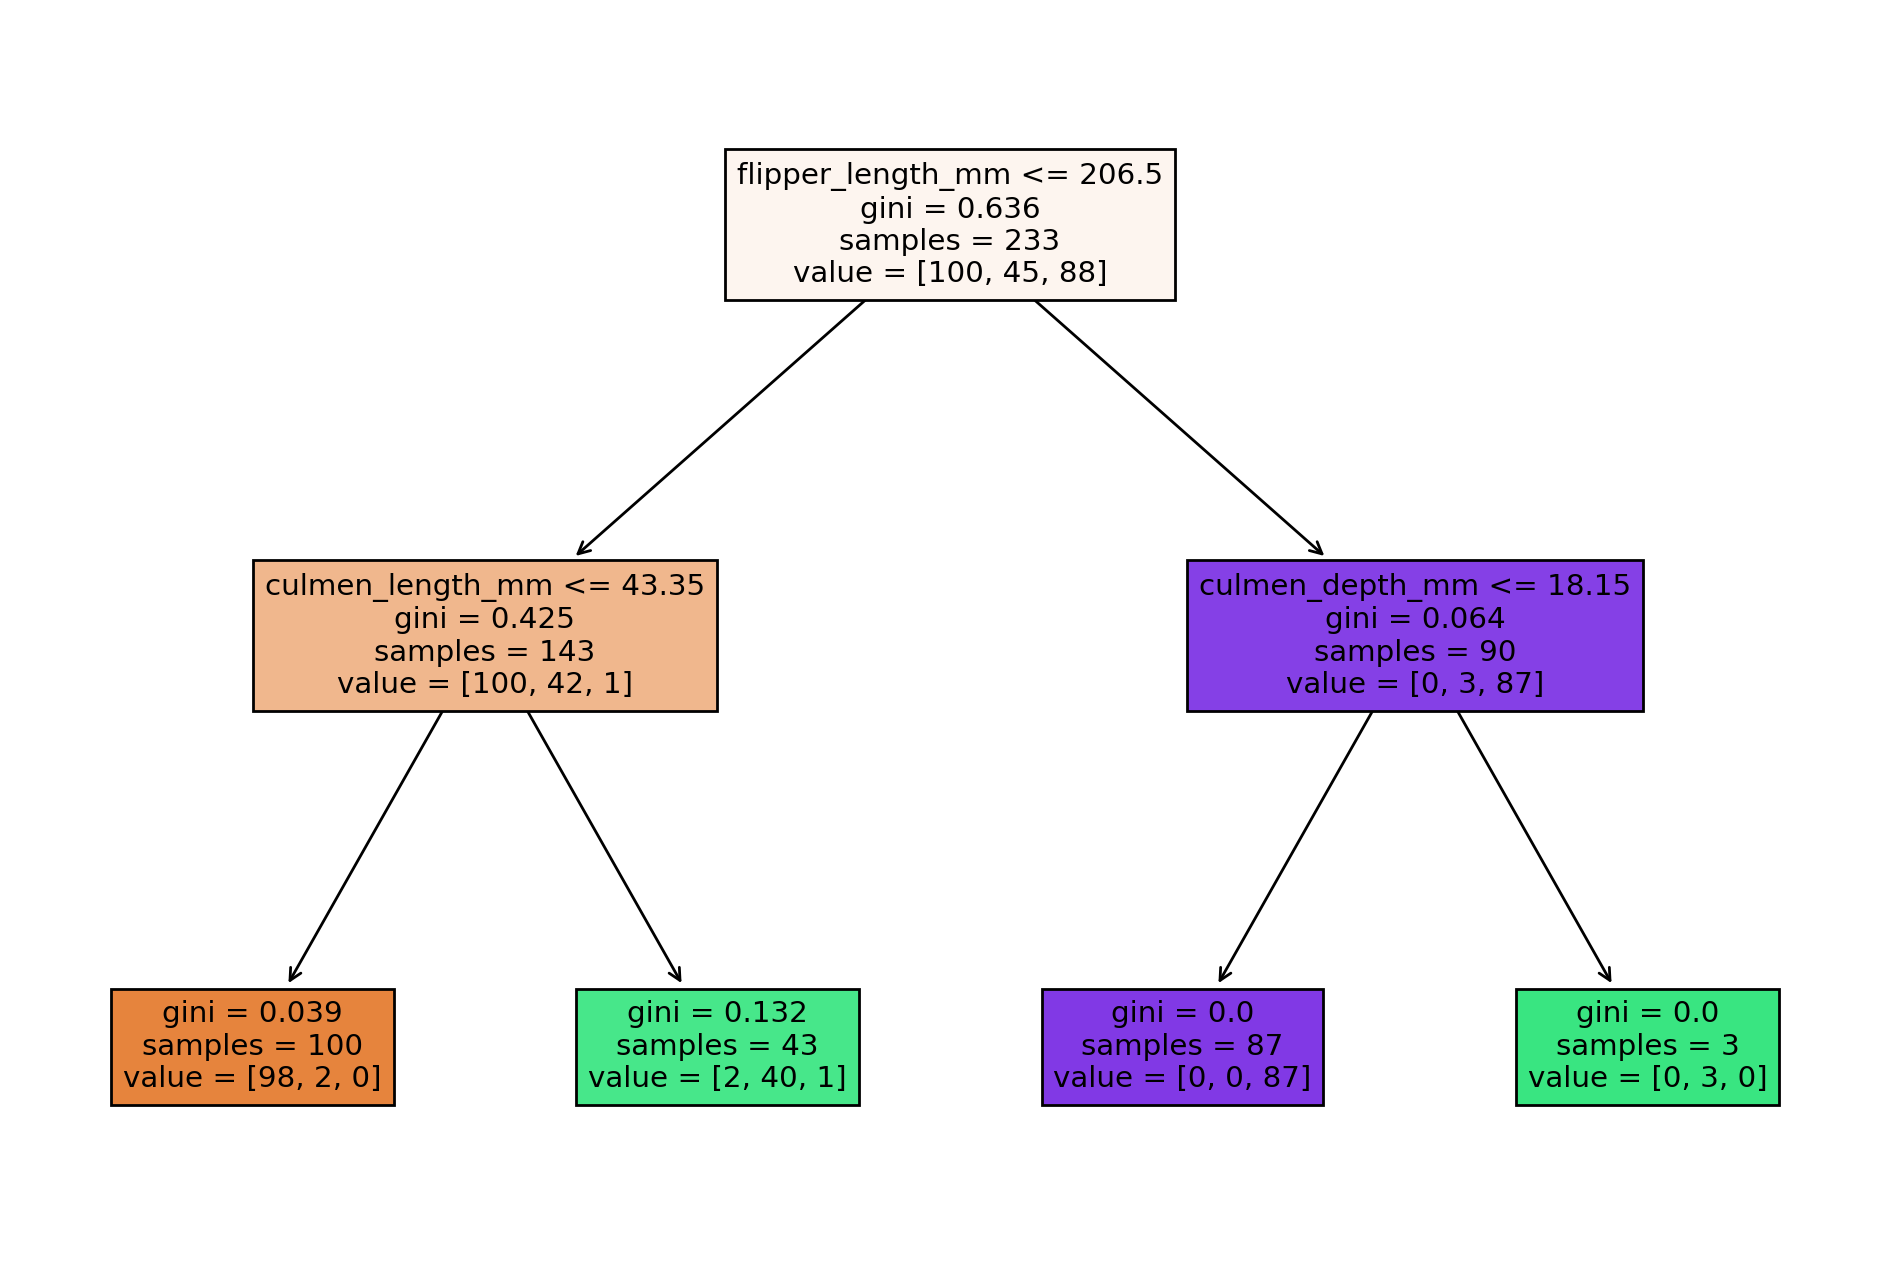

In [47]:
result(less_depth)

### **Less Leaf**

In [58]:
less_leaf = DecisionTreeClassifier(max_leaf_nodes= 4)

In [59]:
less_leaf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=4)

              precision    recall  f1-score   support

      Adelie       0.93      0.91      0.92        46
   Chinstrap       0.87      0.87      0.87        23
      Gentoo       0.97      1.00      0.98        31

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100
 



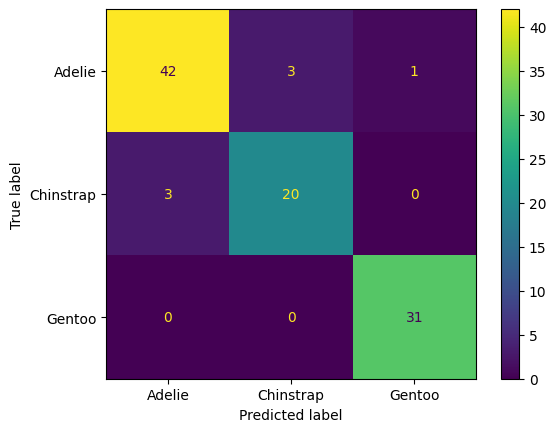

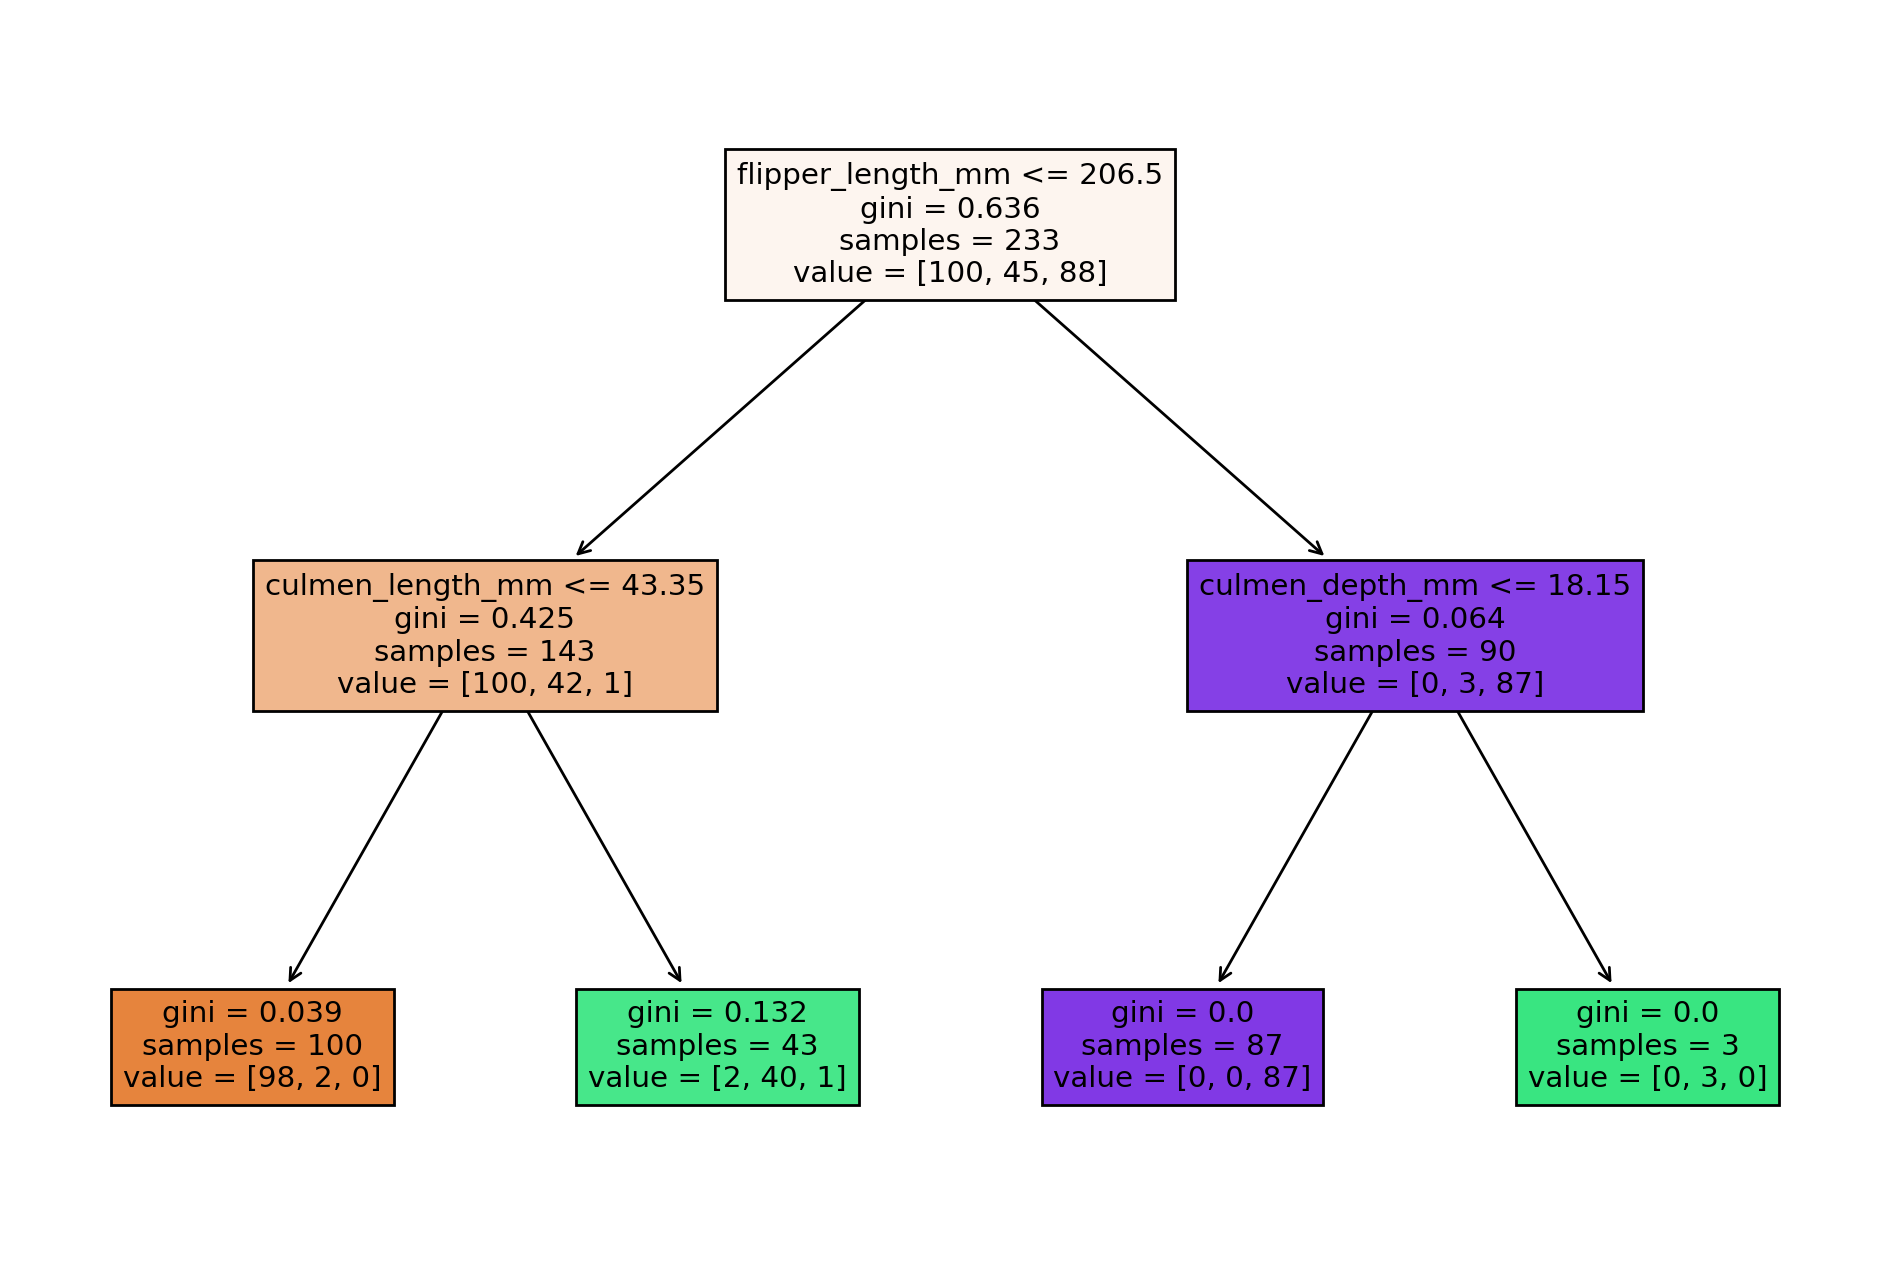

In [60]:
result(less_leaf)

## *Optimization*

In [61]:
entropy = DecisionTreeClassifier(criterion= "entropy")
entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.98      0.91      0.94        46
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       0.94      1.00      0.97        31

    accuracy                           0.95       100
   macro avg       0.94      0.96      0.95       100
weighted avg       0.95      0.95      0.95       100
 



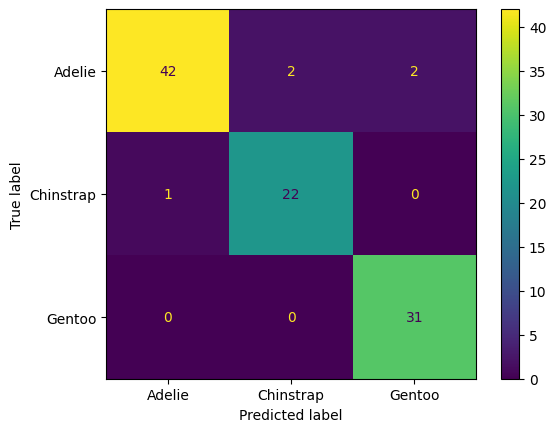

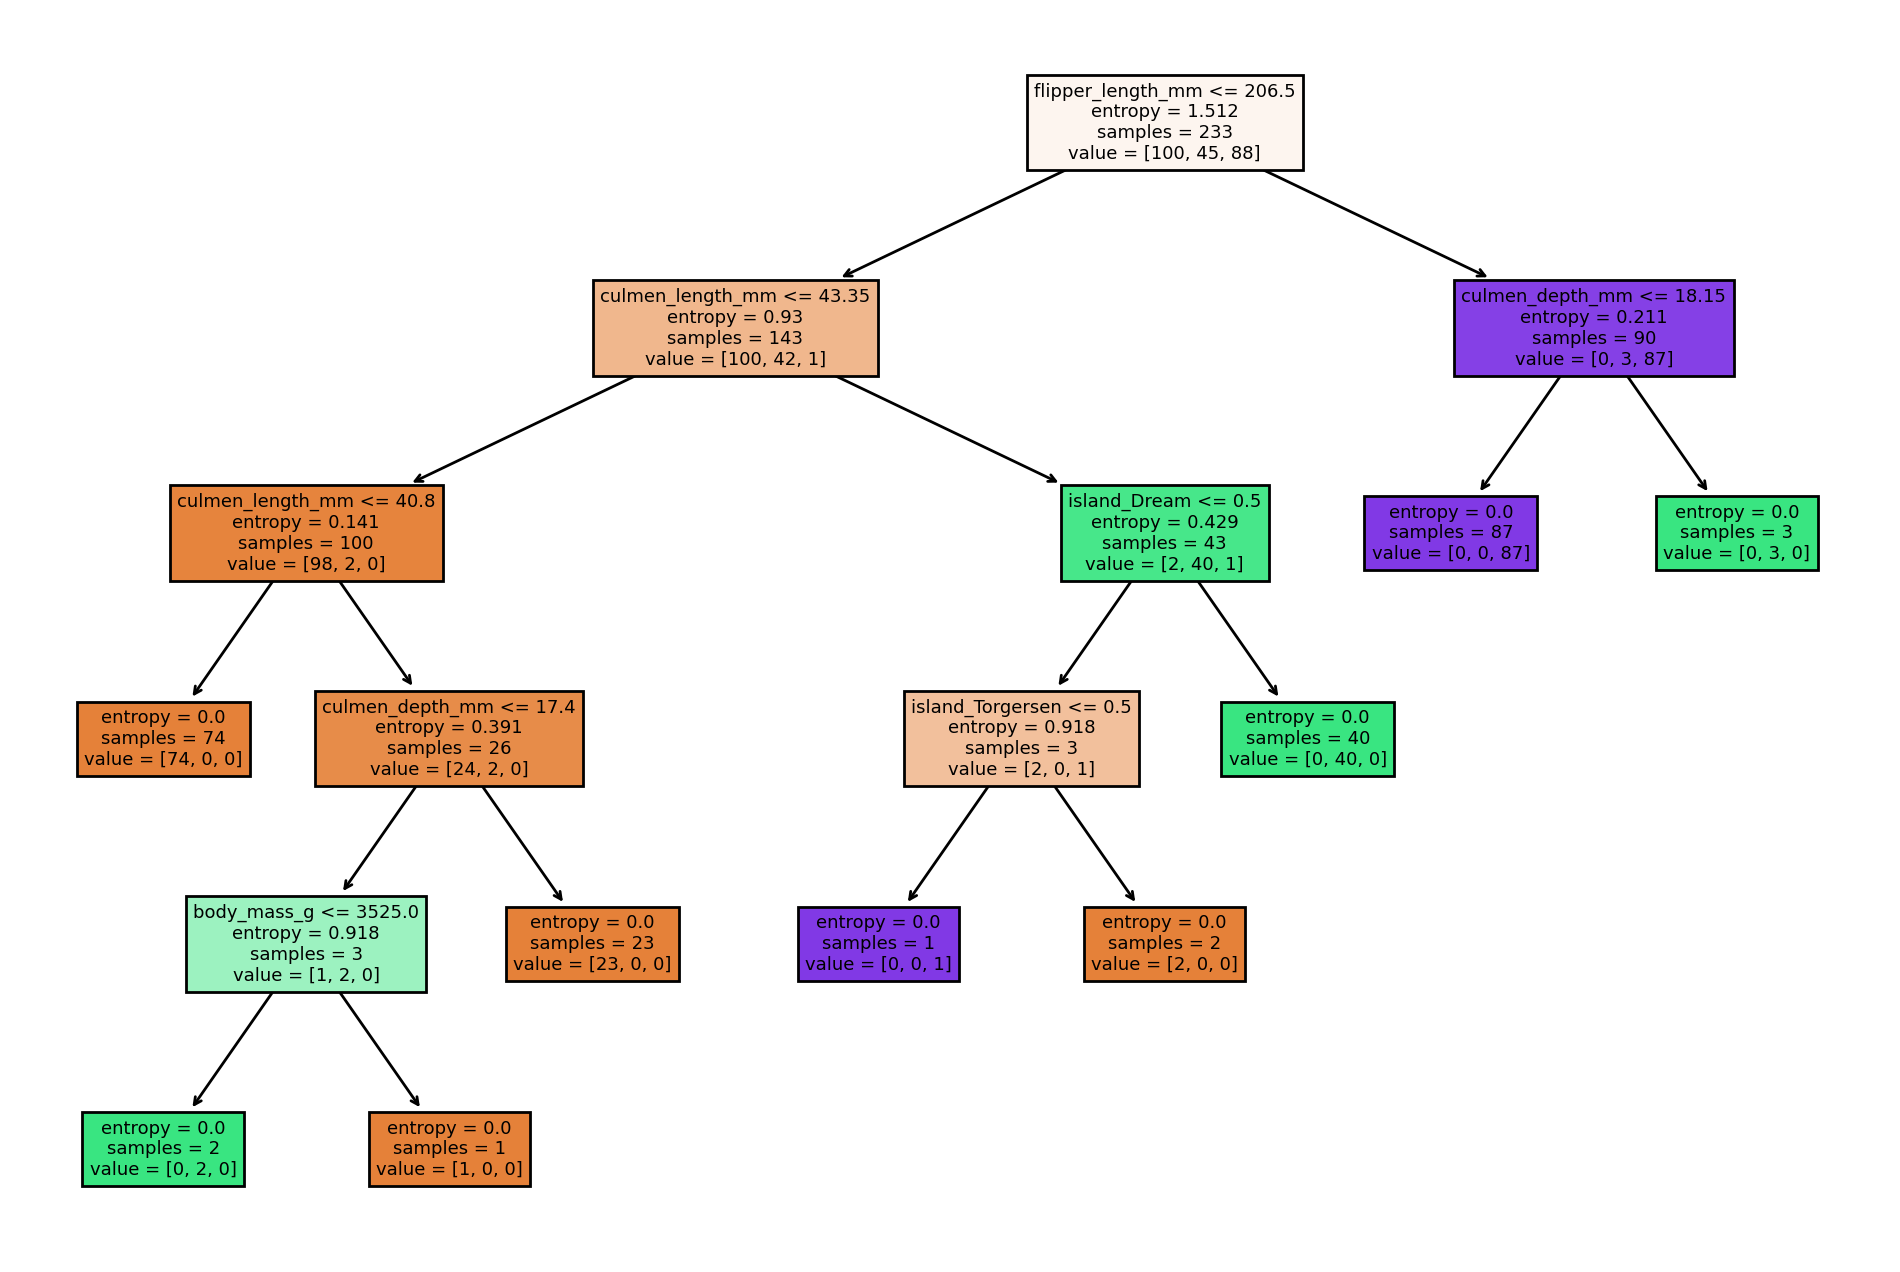

In [62]:
result(entropy)